Dans ce notebook on va utiliser la technique tfidf avec LSTM

In [ ]:
import numpy as np #linear algebra
import pandas as pd #data preprocessing
import csv
import tensorflow as tf


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

nltk.download('punkt')
nltk.download('wordnet')
from tqdm import tqdm
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
import re
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
train_data = pd.read_csv('/content/train.tsv.zip', sep = '\t')
train_data.drop(train_data.columns[0:2],axis=1,inplace=True)
train_data.rename(columns={'Sentiment': 'MOS','Phrase': 'Comment'}, inplace=True)

train_data =train_data.loc[:, ["MOS","Comment"]]
train_data['MOS']+=1
train_data

,MOS,Comment
0,2,A series of escapades demonstrating the adage ...
1,3,A series of escapades demonstrating the adage ...
2,3,A series
3,3,A
4,3,series
...,...,...
156055,3,Hearst 's
156056,2,forced avuncular chortles
156057,4,avuncular chortles
156058,3,avuncular


In [ ]:
df =pd.DataFrame(pd.read_excel('/content/Dataset.xlsx'))
df


,Statistiques horaires,Page,Catégorie d'appareil,Pays,Pages views,Vues uniques,Average visit time,Entries,Rebound rate,Departures (in%),Session Lenght,TimeToClickInMS,SpeedIndex,TTFB,OnLoad,FirstPaint,MOS,net_delay,latency,bandwidht,jitter,id_video,Comment
0,2020042904,/It,Desktop,Tunisia,52,1,32.769231,0,0.0,0.000000,1800,5643,9694,389,806,1800,3,1,107.93,3488,66,vid3,"For learn data science,\nIs it necessary to le..."
1,2020052016,/,Desktop,Tunisia,50,0,74.540000,0,0.0,0.000000,1650,4561,4885,163,330,3550,5,850,69.30,1813,57,vid2,my psychology lecturer recommend us to watch t...
2,2020051501,/It,Desktop,Tunisia,48,1,44.687500,0,0.0,0.000000,657,5484,3713,1588,2000,2822,4,1100,97.21,2763,44,vid3,Great video. You did great explaining this.
3,2020052814,/register,Desktop,Tunisia,44,1,44.209302,0,0.0,0.022727,1350,5119,4954,677,1506,3472,5,1500,111.86,1350,46,vid9,I recommend this video to anyone trying to los...
4,2020052101,/,Desktop,Tunisia,40,1,63.300000,1,0.0,0.000000,1030,4169,4567,117,257,0,5,2000,46.26,378,50,vid9,"I took too many breaks, lol. This is a killer ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2020051609,/,Desktop,Tunisia,1,1,0.000000,1,1.0,1.000000,19,6361,3419,178,388,2753,3,400,56.04,577,47,vid3,how can one be passionate about data science a...
147,2020060819,/,Desktop,Tunisia,1,1,0.000000,1,1.0,1.000000,13,6035,8454,576,1005,1654,4,1500,155.04,3553,37,vid6,He's so handsome 😉
148,2020051614,/?fbclid=IwAR0H7vmH4cszLtkm44y5_fVTojqz_ICvZLy...,Desktop,Tunisia,1,1,0.000000,1,0.0,1.000000,10,4765,4165,475,899,2125,5,1800,94.15,2738,38,vid6,omg😍😍🥰
149,2020051605,/?fbclid=IwAR1MLwPxGFkizMzW3LjM_KZMMys4Bgy0IT8...,Mobile,United States,1,1,0.000000,1,1.0,1.000000,50,4853,3855,719,1420,480,3,1,56.50,2385,77,vid3,complex job


In [ ]:
df.drop(df.columns[0:16],axis=1,inplace=True)
df

,MOS,net_delay,latency,bandwidht,jitter,id_video,Comment
0,3,1,107.93,3488,66,vid3,"For learn data science,\nIs it necessary to le..."
1,5,850,69.30,1813,57,vid2,my psychology lecturer recommend us to watch t...
2,4,1100,97.21,2763,44,vid3,Great video. You did great explaining this.
3,5,1500,111.86,1350,46,vid9,I recommend this video to anyone trying to los...
4,5,2000,46.26,378,50,vid9,"I took too many breaks, lol. This is a killer ..."
...,...,...,...,...,...,...,...
146,3,400,56.04,577,47,vid3,how can one be passionate about data science a...
147,4,1500,155.04,3553,37,vid6,He's so handsome 😉
148,5,1800,94.15,2738,38,vid6,omg😍😍🥰
149,3,1,56.50,2385,77,vid3,complex job


In [ ]:
df.drop(df.columns[1:6],axis=1,inplace=True)
df

,MOS,Comment
0,3,"For learn data science,\nIs it necessary to le..."
1,5,my psychology lecturer recommend us to watch t...
2,4,Great video. You did great explaining this.
3,5,I recommend this video to anyone trying to los...
4,5,"I took too many breaks, lol. This is a killer ..."
...,...,...
146,3,how can one be passionate about data science a...
147,4,He's so handsome 😉
148,5,omg😍😍🥰
149,3,complex job


In [ ]:

for sent in df['Comment']:
       
    sent = re.sub("[^a-zA-Z]"," ",sent) 
    sent = re.sub('\n', '', sent)
    sent = re.sub('\[.*?\]', '', sent)
    sent = re.sub(r'[0-9]','', sent)
    sent = re.sub('[%s]' % re.escape(string.punctuation), '', sent)
    sent = re.sub('\w*\d\w*', '', sent)
    sent = re.sub('[‘’“”…€•–°º@#]', '', sent)
    sent = re.sub(r'http\S+', r'<URL>', sent)
    sent = word_tokenize(sent.lower()) #Tokenize + transformer en miniscule
    sent = [word for word in sent if not word in stopwords.words()]
    lemmatizer = WordNetLemmatizer() #Lemmatize
        
    lemm_word = [lemmatizer.lemmatize(i) for i in sent]
    sent=' '.join(lemm_word)

In [ ]:
df

,MOS,Comment
0,3,"For learn data science,\nIs it necessary to le..."
1,5,my psychology lecturer recommend us to watch t...
2,4,Great video. You did great explaining this.
3,5,I recommend this video to anyone trying to los...
4,5,"I took too many breaks, lol. This is a killer ..."
...,...,...
146,3,how can one be passionate about data science a...
147,4,He's so handsome 😉
148,5,omg😍😍🥰
149,3,complex job


In [ ]:
frames = [df,train_data]
data = pd.concat(frames)
data

,MOS,Comment
0,3,"For learn data science,\nIs it necessary to le..."
1,5,my psychology lecturer recommend us to watch t...
2,4,Great video. You did great explaining this.
3,5,I recommend this video to anyone trying to los...
4,5,"I took too many breaks, lol. This is a killer ..."
...,...,...
156055,3,Hearst 's
156056,2,forced avuncular chortles
156057,4,avuncular chortles
156058,3,avuncular


In [ ]:
x = data['Comment']
y = data['MOS']
print(np.array(x))
print(np.array(y))
print(len(np.array(x)))

['For learn data science,\nIs it necessary to learn c++.,...python..., etc.. Languages??!! First'
 "my psychology lecturer recommend us to watch this. and I'm so happy about it now. gonna try this 20 hrs rule. thanks"
 'Great video. You did great explaining this.' ... 'avuncular chortles'
 'avuncular' 'chortles']
[3 5 4 ... 4 3 3]
156211


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y=le.fit_transform(y)

Y =tf.keras.utils.to_categorical(Y)
print(Y)

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.15)
max_words = len(set(" ".join(X_train).split()))
max_len = X_train.apply(lambda x: len(x)).max()
max_words, max_len

(18507, 549)

In [ ]:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
#from sklearn.feature_extraction.text import TfidfVectorizer
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_seq = sequence.pad_sequences(X_train_seq, maxlen=max_len)
print(X_train_seq)
print(X_train_seq.shape)

[[   0    0    0 ...   30  112   85]
 [   0    0    0 ...    4 7658 2485]
 [   0    0    0 ...    0    0 5063]
 ...
 [   0    0    0 ...   10   28   20]
 [   0    0    0 ... 6818 2957 8974]
 [   0    0    0 ... 5248 2210    4]]
(132779, 549)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features=376)
tfidf_mat = vec.fit_transform(X_train).toarray()
print(type(tfidf_mat),tfidf_mat.shape)  

<class 'numpy.ndarray'> (132779, 376)


In [ ]:
#LSTM Model
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Embedding,Dense,LSTM,Dropout,SpatialDropout1D,BatchNormalization

num_class = 5
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(LSTM(256,  return_sequences=False))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_class,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 549, 100)          1850700   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               365568    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0

In [ ]:
verbose = 1
epochs = 5
batch_size = 128
history = model.fit(tfidf_mat, Y_train, epochs = epochs, batch_size=batch_size, verbose = verbose)

Epoch 1/5
1038/1038 [==============================] - 146s 140ms/step - loss: 1.4566 - accuracy: 0.4557
Epoch 2/5
1038/1038 [==============================] - 145s 140ms/step - loss: 1.3147 - accuracy: 0.5057
Epoch 3/5
1038/1038 [==============================] - 145s 139ms/step - loss: 1.3085 - accuracy: 0.5075
Epoch 4/5
1038/1038 [==============================] - 144s 139ms/step - loss: 1.3053 - accuracy: 0.5081
Epoch 5/5
1038/1038 [==============================] - 144s 139ms/step - loss: 1.3016 - accuracy: 0.5087


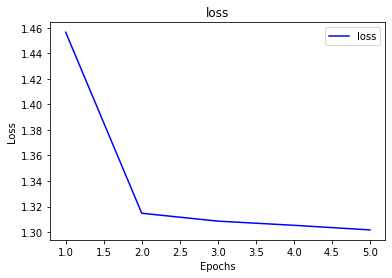

In [ ]:
import matplotlib.pyplot as plt
loss_model = history.history['loss']

epochs = range(1,6)
plt.plot(epochs, loss_model, 'b', label='loss')
plt.title('Training and Validation loss')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

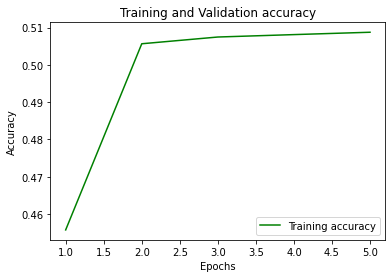

In [ ]:
loss_train = history.history['accuracy']

epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()